# Location-based assignment

This is a location-based assignment in San Francisco. I chose an interesting symbol in front of the place I usually pick up lunch from.

## 1. Resize image to 512 pixels

In [20]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from PIL import Image
from resizeimage import resizeimage

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [21]:
photos = glob('*.jpeg')
PHOTO_SIZE = 512

In [22]:
photos_flattened = []
# for each image path
for path in photos:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, [PHOTO_SIZE, PHOTO_SIZE])
            # flatten the matrix to an array and append it to all flattened images
            photos_flattened.append(np.array(cover).flatten())

In [23]:
# Flatten it once more
photos_flattened = np.asarray(photos_flattened)

In [24]:
X = np.stack(i for i in photos_flattened)

/home/khanh/Documents/cs156-pcw-khanhtmn/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3191: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [25]:
X.shape

(48, 786432)

Let's take a look at the original photos. I took them at different angles!

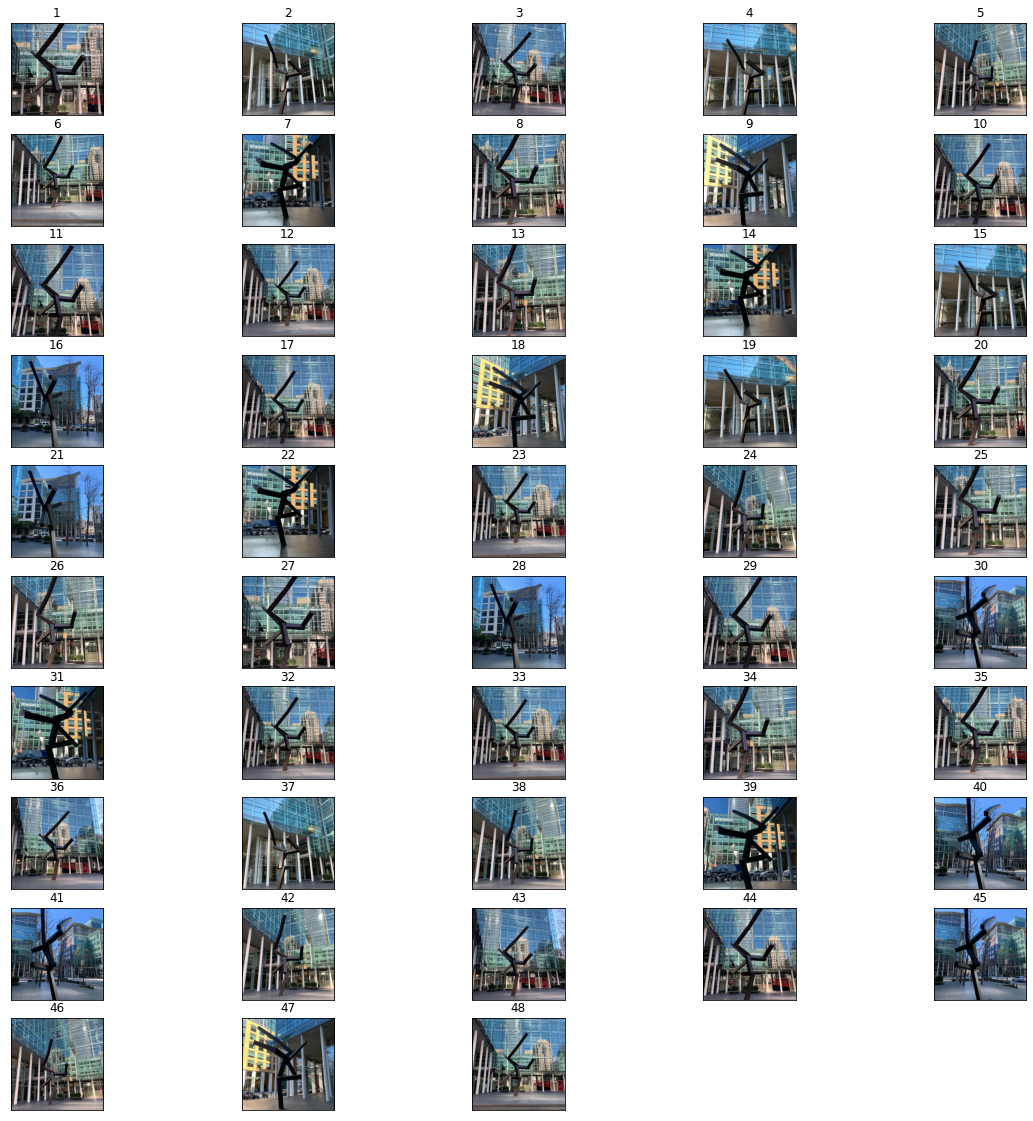

In [26]:
# Original photos

nrows = len(X)//5 + 1
ncols = 5

plt.figure(figsize=[20, 20])
plt.title("Original photos")
for i in range(len(X)):
    plt.subplot(nrows, ncols, i+1, xticks=[], yticks=[])
    plt.imshow(X[i].reshape(PHOTO_SIZE, PHOTO_SIZE, 3).astype(np.uint8))
    plt.title(f"{i+1}")
plt.show()

## 2. Use PCA to project the images down to a 2D representation

In [27]:
pca = PCA(n_components=2)
pca.fit(X)
X_2d = pca.transform(X)
print(X_2d.shape)

(48, 2)


In [28]:
variance_explained = pca.explained_variance_ratio_

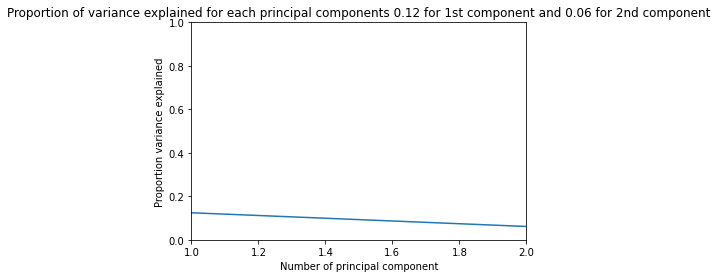

In [29]:
plt.plot(range(1,3,1), variance_explained)
plt.title(f'Proportion of variance explained for each principal components {round(variance_explained[0], 2)} for 1st component and {round(variance_explained[1], 2)} for 2nd component')
plt.xlabel('Number of principal component')
plt.ylabel('Proportion variance explained')
plt.ylim(0, 1)
plt.xlim([1, 2])
plt.show()

In [30]:
cum_sum_variance_explained = np.cumsum(variance_explained)

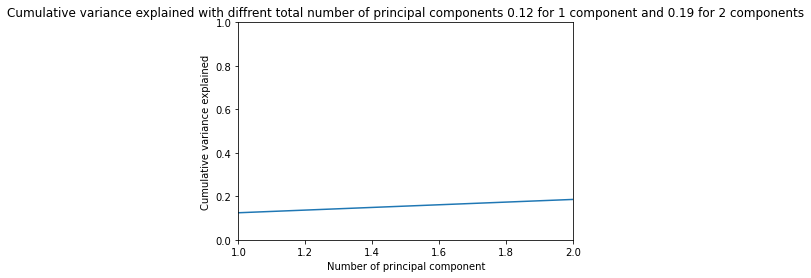

In [31]:
plt.plot(range(1,3,1), cum_sum_variance_explained)
plt.title(f'Cumulative variance explained with diffrent total number of principal components {round(cum_sum_variance_explained[0], 2)} for 1 component and {round(cum_sum_variance_explained[1], 2)} for 2 components')
plt.xlabel('Number of principal component')
plt.ylabel('Cumulative variance explained')
plt.ylim(0, 1)
plt.xlim([1, 2])
plt.show()

It seems like the two components together can only explain 19% variation in the data, which makes sense given that our object has a very unusual shape. In addition, the photos were taken from a lot of angles!

## 3. Visually inspect the 2D locations in the new space

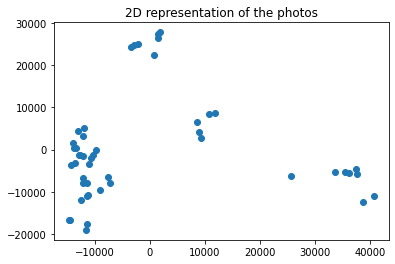

In [32]:
plt.scatter(X_2d[:,0], X_2d[:,1])
plt.title(f'2D representation of the photos')
plt.show()

Seems like the 2D locations cluster into 4 different groups, which were also the different angles (front, back, left, right) that I took the photos from!

We can also represent the information in a table:

In [33]:
pca_df = pd.DataFrame(data=X_2d, columns=['1', '2'])
pca_df.head()

1            2
0  -7246.326090 -7918.640678
1   9350.144377  2814.114686
2  -9705.062618  -124.327807
3  10766.790330  8391.582263
4 -10653.344788 -1874.696437

## 4. Show reconstruction from each low-dimensional representation

Let's view the original photos again to compare with the reconstructed photos

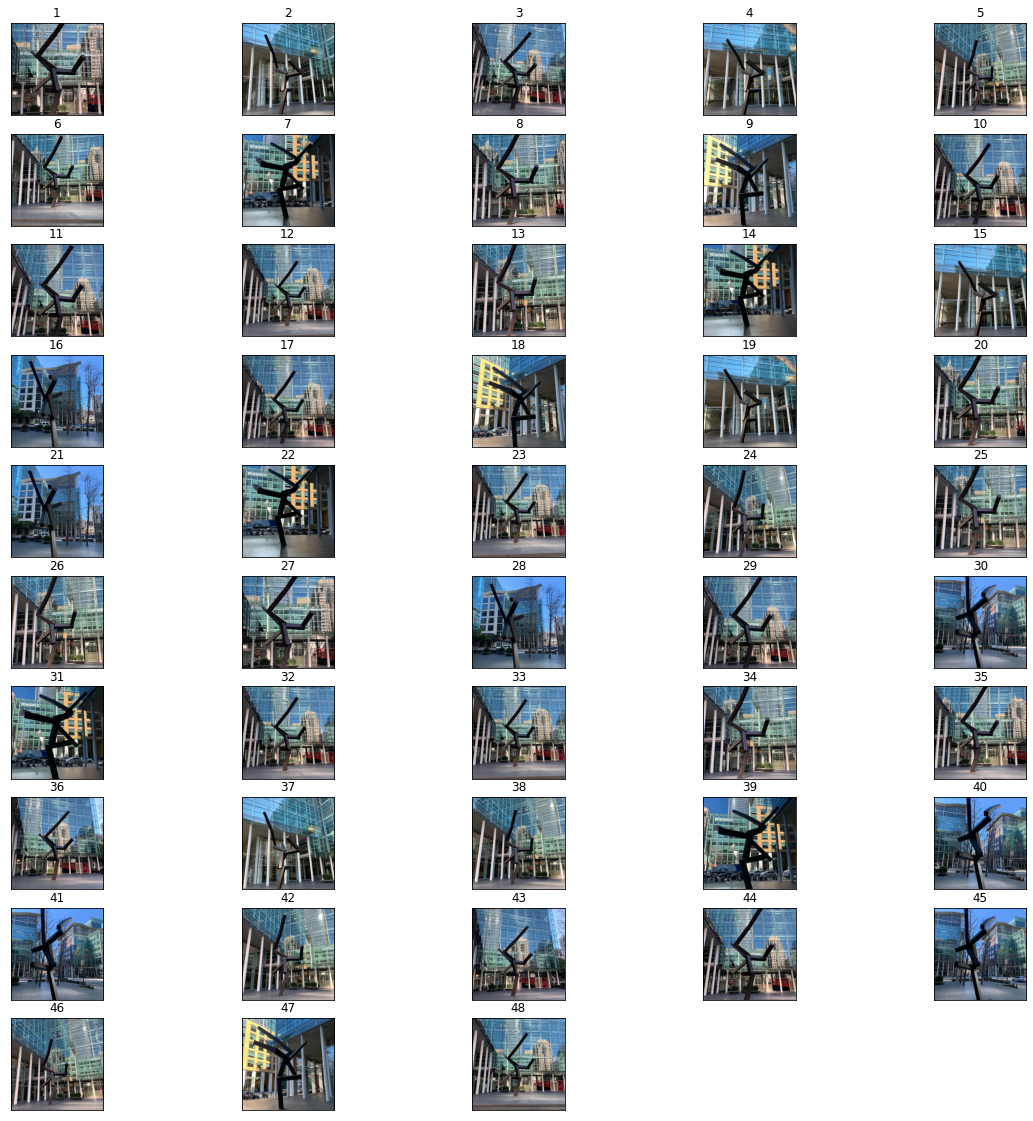

In [34]:
# Original photos

nrows = len(X)//5 + 1
ncols = 5

plt.figure(figsize=[20, 20])
plt.title("Original photos")
for i in range(len(X)):
    plt.subplot(nrows, ncols, i+1, xticks=[], yticks=[])
    plt.imshow(X[i].reshape(PHOTO_SIZE, PHOTO_SIZE, 3).astype(np.uint8))
    plt.title(f"{i+1}")
plt.show()

In [35]:
reconstructed = pca.inverse_transform(X_2d)

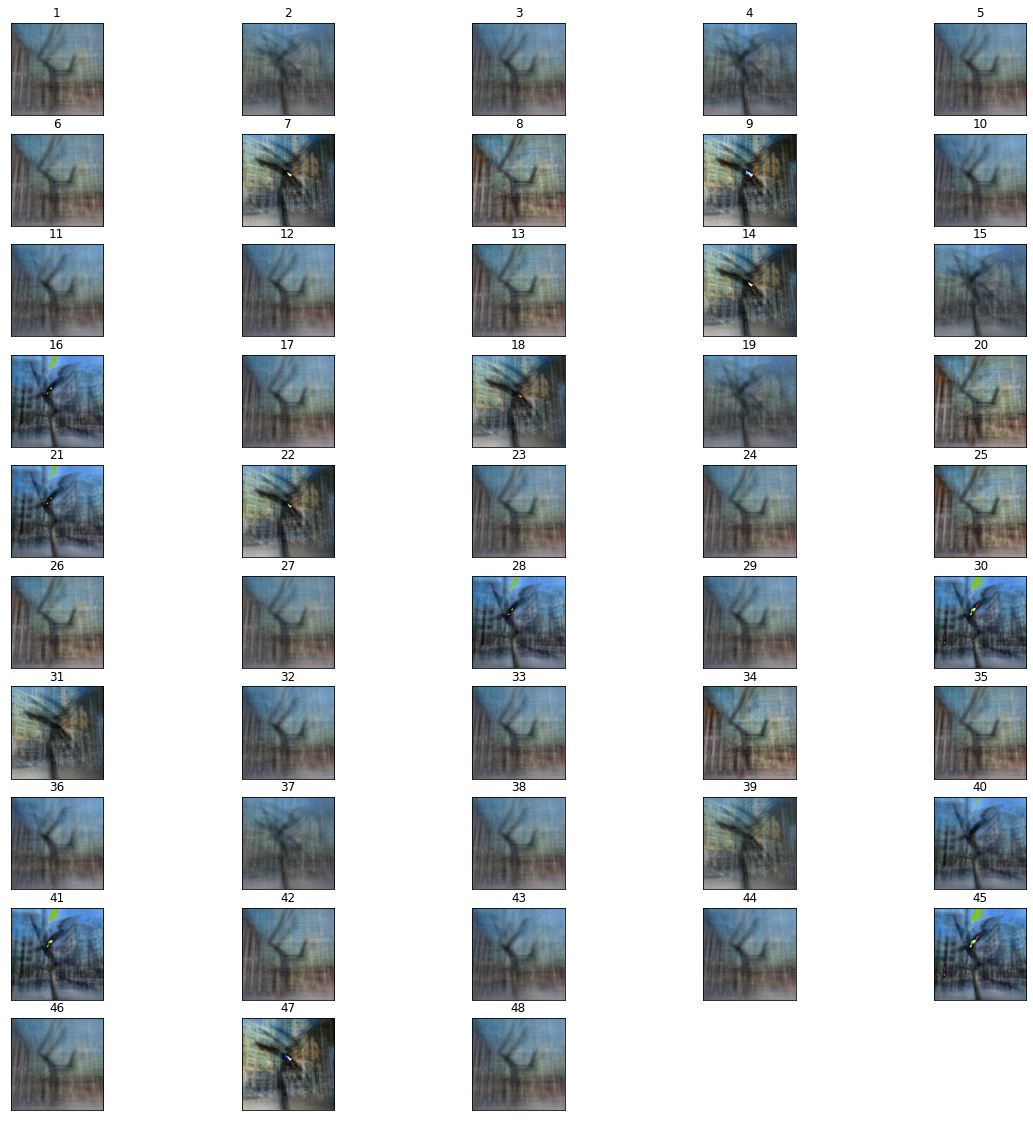

In [36]:
# Reconstructed photos

nrows = len(X)//5 + 1
ncols = 5

plt.figure(figsize=[20, 20])
for i in range(len(X)):
    plt.subplot(nrows, ncols, i+1, xticks=[], yticks=[])
    plt.imshow(reconstructed[i].reshape(PHOTO_SIZE, PHOTO_SIZE, 3).astype(np.uint8))
    plt.title(f"{i+1}")
plt.show()

## 5. Plot the reconstruction from a point far away

Let's pick 3 far away points to compare their reconstructions

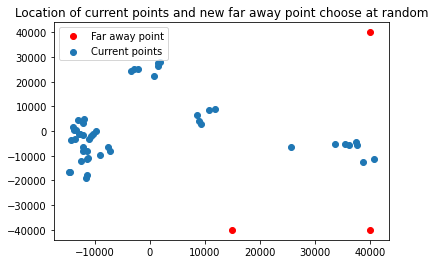

In [37]:
far_away_points = np.array([[40000, 40000], [40000, -40000], [15000, -40000]])

plt.plot(far_away_points[:, 0], far_away_points[:, 1], 'ro', label="Far away point") 
plt.scatter(X_2d[:, 0], X_2d[:, 1], label="Current points")
plt.title("Location of current points and new far away point choose at random")
plt.legend()
plt.show()

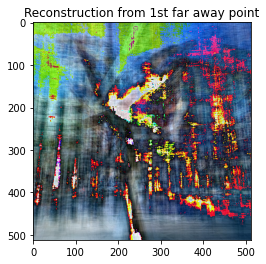

In [38]:
current_far_away_point = np.reshape(np.array(far_away_points[0]), (1, -1))
far_away_point_inversed = pca.inverse_transform(current_far_away_point)

plt.title("Reconstruction from 1st far away point")
plt.imshow(np.reshape(far_away_point_inversed, (PHOTO_SIZE, PHOTO_SIZE, 3)).astype(np.uint8))

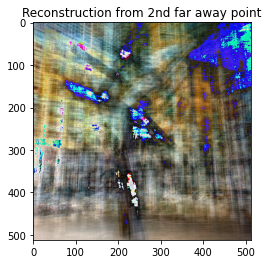

In [39]:
current_far_away_point = np.reshape(np.array(far_away_points[1]), (1, -1))
far_away_point_inversed = pca.inverse_transform(current_far_away_point)

plt.title("Reconstruction from 2nd far away point")
plt.imshow(np.reshape(far_away_point_inversed, (PHOTO_SIZE, PHOTO_SIZE, 3)).astype(np.uint8))

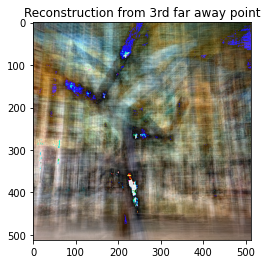

In [40]:
current_far_away_point = np.reshape(np.array(far_away_points[2]), (1, -1))
far_away_point_inversed = pca.inverse_transform(current_far_away_point)

plt.title("Reconstruction from 3rd far away point")
plt.imshow(np.reshape(far_away_point_inversed, (PHOTO_SIZE, PHOTO_SIZE, 3)).astype(np.uint8))

There's a little difference between the reconstruction at different far away points, perhaps in lighting!

## Reflection

- Overall, not so much variation is explained (~19%) with 2 components.
- Because of the low variation, the reconstruction is not really close to the original one. The reconstruction also got distracted because of the background building noise.